# Alignment method evaluation

___

In [1]:
%config InlineBackend.figure_format = 'retina'
%load_ext blackcellmagic

In [2]:
import numpy as np

import matplotlib.pyplot as plt

import pandas as pd

___

# Load data

In [3]:
stats = pd.read_csv("alignment_stats.csv")

In [4]:
stats.head()

,Dataset (short name),Species,Condition,Brain area,Replicate #,ScSeq Chemistry,Sequencer,Preprocessing tool,# of cells (after filtering),Sequencing depth (number of reads processed),"Reads mapped confidently to genome (%) (cellranger: ""Reads Mapped Confidently to Genome"")","Reads mapped confidently to transcriptome (%) (kb: ""p_pseudoaligned""; cellranger: ""Reads Mapped Confidently to Transcriptome"")",Mean UMI count per cell,Total UMI count
0,C1,Taeniopygia guttata,GFP,HVC,1,10xv3,NovaSeq S4,kallisto bustools,9764,744473151,NaN,50.7,1496.15,14608449.0
1,C1,Taeniopygia guttata,GFP,HVC,1,10xv3,NovaSeq S4,"kallisto bustools --mm (GFP, tetx, and PEST ad...",9769,744473151,NaN,50.7,1496.15,14610227.0
2,C1,Taeniopygia guttata,GFP,HVC,1,10xv3,NovaSeq S4,"kallisto bustools unfiltered --mm (GFP, tetx, ...",9762,744473151,NaN,50.7,1580.85,15432288.0
3,C1,Taeniopygia guttata,GFP,HVC,1,10xv3,NovaSeq S4,cellranger,5845,744473151,92.0,41.4,NaN,NaN
4,C2,Taeniopygia guttata,GFP,HVC,2,10xv3,NovaSeq S4,kallisto bustools,6060,787232472,NaN,45.7,1651.23,10006455.0


___

### Clean up dataframe for barplot
Keep only columns needed for plotting of the reads mapped confidently to transcriptome (%):

In [5]:
stats_plot = stats[["Dataset (short name)", "Preprocessing tool", 'Reads mapped confidently to transcriptome (%) (kb: "p_pseudoaligned"; cellranger: "Reads Mapped Confidently to Transcriptome")']]

In [6]:
# Rename columns for ease
stats_plot = stats_plot.rename(
    columns={
        "Dataset (short name)": "dataset",
        "Preprocessing tool": "tool",
        'Reads mapped confidently to transcriptome (%) (kb: "p_pseudoaligned"; cellranger: "Reads Mapped Confidently to Transcriptome")': "perc_aligned",
    }
)

# Set tool columns as categorical
stats_plot["tool"] = stats_plot["tool"].astype("category")

# Rename 'tool' column
stats_plot["tool"] = stats_plot["tool"].cat.rename_categories(
    {
        "cellranger": "Cell Ranger v6.0.1",
        "kallisto bustools": "kallisto bustools v0.26.3",
        "kallisto bustools --mm (GFP, tetx, and PEST added to ref)": "kallisto bustools\n+ multimapping",
        "kallisto bustools unfiltered --mm (GFP, tetx, and PEST added to ref)": "kallisto bustools\n(manually filtered)\n+ multimapping",
    }
)

# Set dataset columns as categorical
stats_plot["dataset"] = stats_plot["dataset"].astype("category")

# Rename 'dataset' column
stats_plot["dataset"] = stats_plot["dataset"].cat.rename_categories(
    {
        "C1": "Control 1",
        "C2": "Control 2",
        "E1": "tetX 1",
        "E2": "tetX 2",
    }
)

# Organize data frame by index / column values:
stats_plot = stats_plot.pivot(index="tool", columns="dataset", values="perc_aligned")
stats_plot

dataset,Control 1,Control 2,tetX 1,tetX 2
tool,,,,
Cell Ranger v6.0.1,41.4,36.2,41.9,47.3
kallisto bustools v0.26.3,50.7,45.7,51.9,57.4
kallisto bustools\n+ multimapping,50.7,45.7,51.9,57.4
kallisto bustools\n(manually filtered)\n+ multimapping,50.7,45.7,51.9,57.4


Same for # of cells retained (after filtering):

In [7]:
cells_plot = stats[["Dataset (short name)", "Preprocessing tool", "# of cells (after filtering)"]]

In [8]:
# Rename columns for ease
cells_plot = cells_plot.rename(
    columns={
        "Dataset (short name)": "dataset",
        "Preprocessing tool": "tool",
        "# of cells (after filtering)": "cells",
    }
)

# Set tool columns as categorical
cells_plot["tool"] = cells_plot["tool"].astype("category")

# Rename 'tool' column
cells_plot["tool"] = cells_plot["tool"].cat.rename_categories(
    {
        "cellranger": "Cell Ranger v6.0.1",
        "kallisto bustools": "kallisto bustools v0.26.3",
        "kallisto bustools --mm (GFP, tetx, and PEST added to ref)": "kallisto bustools\n+ multimapping",
        "kallisto bustools unfiltered --mm (GFP, tetx, and PEST added to ref)": "kallisto bustools\n(manually filtered)\n+ multimapping",
    }
)

# Set dataset columns as categorical
cells_plot["dataset"] = cells_plot["dataset"].astype("category")

# Rename 'dataset' column
cells_plot["dataset"] = cells_plot["dataset"].cat.rename_categories(
    {
        "C1": "Control 1",
        "C2": "Control 2",
        "E1": "tetX 1",
        "E2": "tetX 2",
    }
)

# Organize data frame by index / column values:
cells_plot = cells_plot.pivot(index="tool", columns="dataset", values="cells")
cells_plot

dataset,Control 1,Control 2,tetX 1,tetX 2
tool,,,,
Cell Ranger v6.0.1,5845,4566,6224,9997
kallisto bustools v0.26.3,9764,6060,7707,12306
kallisto bustools\n+ multimapping,9769,6060,7707,12306
kallisto bustools\n(manually filtered)\n+ multimapping,9762,6047,7706,12288


Same for mean UMI counts per cell:

In [9]:
umi_plot = stats[stats["Preprocessing tool"]!="cellranger"][["Dataset (short name)", "Preprocessing tool", "Mean UMI count per cell"]]

In [10]:
# Rename columns for ease
umi_plot = umi_plot.rename(
    columns={
        "Dataset (short name)": "dataset",
        "Preprocessing tool": "tool",
        "Mean UMI count per cell": "mean_umi",
    }
)

# Set tool columns as categorical
umi_plot["tool"] = umi_plot["tool"].astype("category")

# Rename 'tool' column
umi_plot["tool"] = umi_plot["tool"].cat.rename_categories(
    {
#         "cellranger": "Cell Ranger v6.0.1",
        "kallisto bustools": "kallisto bustools v0.26.3",
        "kallisto bustools --mm (GFP, tetx, and PEST added to ref)": "kallisto bustools\n+ multimapping",
        "kallisto bustools unfiltered --mm (GFP, tetx, and PEST added to ref)": "kallisto bustools\n(manually filtered)\n+ multimapping",
    }
)

# Set dataset columns as categorical
umi_plot["dataset"] = umi_plot["dataset"].astype("category")

# Rename 'dataset' column
umi_plot["dataset"] = umi_plot["dataset"].cat.rename_categories(
    {
        "C1": "Control 1",
        "C2": "Control 2",
        "E1": "tetX 1",
        "E2": "tetX 2",
    }
)

# Organize data frame by index / column values:
umi_plot = umi_plot.pivot(index="tool", columns="dataset", values="mean_umi")
umi_plot

dataset,Control 1,Control 2,tetX 1,tetX 2
tool,,,,
kallisto bustools v0.26.3,1496.15,1651.23,1747.60,2146.11
kallisto bustools\n+ multimapping,1496.15,1651.23,1747.60,2146.11
kallisto bustools\n(manually filtered)\n+ multimapping,1580.85,1747.64,1852.42,2265.43


___

# Plotting

In [11]:
# fig, ax = plt.subplots(figsize=(15, 9))
# # Create another axes that shares the same x-axis as ax
# ax2 = ax.twinx()

# width = 0.1
# # colors = ["blue", "lightblue", "darkorange", "moccasin"]
# # colors = ["#0570b0", "#a6cee3", "#fd8d3c", "#fdcc8a"]
# colors = ["#0571b0", "#a6cee3", "#e66101", "#fdb863"]
# fontsize = 13

# for i, tool in enumerate(stats_plot.index.values):
#     ## Plot % reads aligned
#     if i == 0:
#         ax.bar((i - width*3.5)-0.015, stats_plot.loc[tool].values[0], width=width, color=colors[0], label=stats_plot.loc[tool].index[0])
#         ax.bar((i - width*1.5)-0.005, stats_plot.loc[tool].values[1], width=width, color=colors[1], label=stats_plot.loc[tool].index[1])
#         ax.bar((i + width/2)+0.005, stats_plot.loc[tool].values[2], width=width, color=colors[2], label=stats_plot.loc[tool].index[2])
#         ax.bar((i + width*2.5)+0.015, stats_plot.loc[tool].values[3], width=width, color=colors[3], label=stats_plot.loc[tool].index[3])
#     else:
#         ax.bar((i - width*3.5)-0.015, stats_plot.loc[tool].values[0], width=width, color=colors[0])
#         ax.bar((i - width*1.5)-0.005, stats_plot.loc[tool].values[1], width=width, color=colors[1])
#         ax.bar((i + width/2)+0.005, stats_plot.loc[tool].values[2], width=width, color=colors[2])
#         ax.bar((i + width*2.5)+0.015, stats_plot.loc[tool].values[3], width=width, color=colors[3])
        
#     # Add % reads aligned number above each bar
#     ax.text((i - width*3.5)-0.015, stats_plot.loc[tool].values[0]+0.1, f"{int(stats_plot.loc[tool].values[0])}%", color=colors[0], ha="center")
#     ax.text((i - width*1.5)-0.005, stats_plot.loc[tool].values[1]+0.1, f"{int(stats_plot.loc[tool].values[1])}%", color=colors[1], ha="center")
#     ax.text((i + width/2)+0.005, stats_plot.loc[tool].values[2]+0.1, f"{int(stats_plot.loc[tool].values[2])}%", color=colors[2], ha="center")
#     ax.text((i + width*2.5)+0.015, stats_plot.loc[tool].values[3]+0.1, f"{int(stats_plot.loc[tool].values[3])}%", color=colors[3], ha="center")
        
#     ## Plot # of cells retained after basic filtering
#     ax2.bar((i - width*2.5)-0.015, cells_plot.loc[tool].values[0], width=width, color=colors[0], alpha=0.5, hatch="/", edgecolor=colors[0])
#     ax2.bar((i - width/2)-0.005, cells_plot.loc[tool].values[1], width=width, color=colors[1], alpha=0.5, hatch="/", edgecolor=colors[1])
#     ax2.bar((i + width*1.5)+0.005, cells_plot.loc[tool].values[2], width=width, color=colors[2], alpha=0.5, hatch="/", edgecolor=colors[2])
#     ax2.bar((i + width*3.5)+0.015, cells_plot.loc[tool].values[3], width=width, color=colors[3], alpha=0.5, hatch="/", edgecolor="orange") 
    
#     # Add # of cells number above each bar
#     ax2.text((i - width*2.5)-0.015, cells_plot.loc[tool].values[0]+40, int(cells_plot.loc[tool].values[0]), color=colors[0], ha="center", fontsize=9)
#     ax2.text((i - width/2)-0.005, cells_plot.loc[tool].values[1]+40, int(cells_plot.loc[tool].values[1]), color=colors[1], ha="center", fontsize=9)
#     ax2.text((i + width*1.5)+0.005, cells_plot.loc[tool].values[2]+40, int(cells_plot.loc[tool].values[2]), color=colors[2], ha="center", fontsize=9)
#     ax2.text((i + width*3.5)+0.015, cells_plot.loc[tool].values[3]+40, int(cells_plot.loc[tool].values[3]), color=colors[3], ha="center", fontsize=9)
    

# # Set x-axis labels
# labels = stats_plot.index.values
# x = np.arange(len(labels))
# ax.set_xticks(x)
# ax.set_xticklabels(labels, fontsize=fontsize)
# ax.tick_params(bottom=False)

# ax.spines['right'].set_linestyle((0,(8,5)))
# ax2.spines['right'].set_linestyle((0,(8,5)))

# # Add labels
# ax.set_ylabel('Reads mapped confidently to transcriptome (%)', fontsize=fontsize)
# ax2.set_ylabel('Number of cells retained after filtering', fontsize=fontsize)
# # ax.set_xlabel('Tool', fontsize=fontsize)
# ax.tick_params(axis='both', labelsize=fontsize)
# ax2.tick_params(axis='both', labelsize=fontsize)

# ax.margins(x=0.03)

# # Set y axis limits
# ax.set_ylim(bottom=32, top=60)
# ax2.set_ylim(bottom=4200, top=13230)

# # Add red line at 50% reads mapped / 10,000 cells retained
# # ax.axhline(50, color="gray", ls="--", lw=1)

# # Add grid
# ax.yaxis.grid(color='lightgray')
# ax.set_axisbelow(True)
# ax2.set_axisbelow(True)

# # Add legend
# ax.legend(fontsize=fontsize)    

# Split bar plots

In [12]:
figsize = (10, 7)
# Define width of bars
width = 0.2

# Define colors
# colors = ["blue", "lightblue", "darkorange", "moccasin"]
# colors = ["#0570b0", "#a6cee3", "#fd8d3c", "#fdcc8a"]
colors = ["#0571b0", "#a6cee3", "#e66101", "#fdb863"]

fontsize = 13

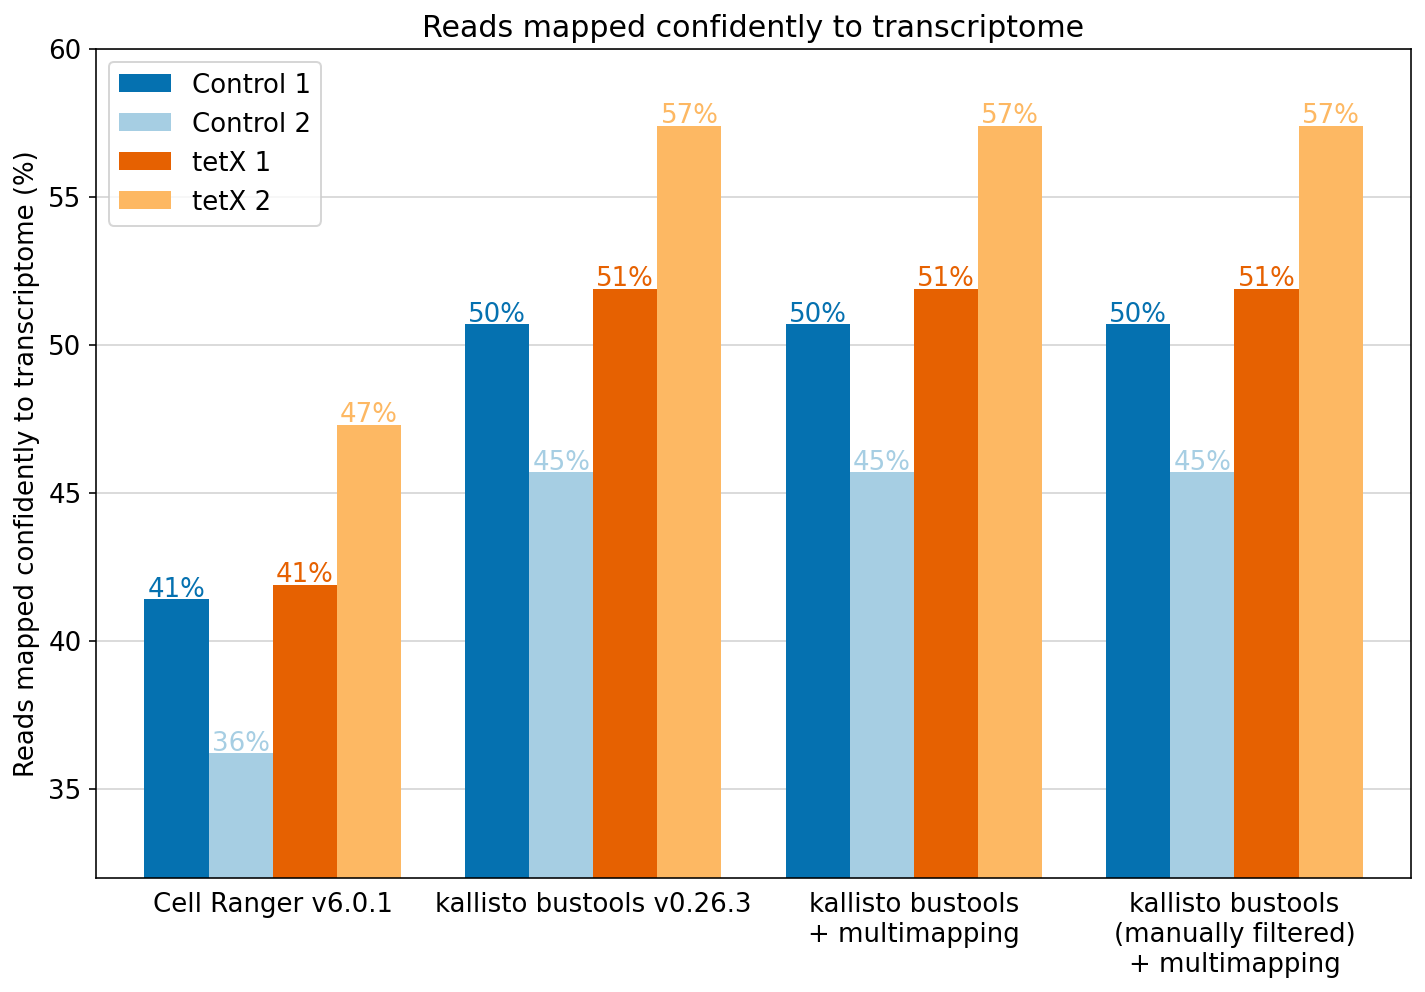

In [13]:
fig, ax = plt.subplots(figsize=figsize)

for i, tool in enumerate(stats_plot.index.values):
    ## Plot % reads aligned
    # Define positions of bars
    pos1 = i - width*1.5
    pos2 = i - width/2
    pos3 = i + width/2
    pos4 = i + width*1.5
    
    if i == 0:
        ax.bar(pos1, stats_plot.loc[tool].values[0], width=width, color=colors[0], label=stats_plot.loc[tool].index[0])
        ax.bar(pos2, stats_plot.loc[tool].values[1], width=width, color=colors[1], label=stats_plot.loc[tool].index[1])
        ax.bar(pos3, stats_plot.loc[tool].values[2], width=width, color=colors[2], label=stats_plot.loc[tool].index[2])
        ax.bar(pos4, stats_plot.loc[tool].values[3], width=width, color=colors[3], label=stats_plot.loc[tool].index[3])
    else:
        ax.bar(pos1, stats_plot.loc[tool].values[0], width=width, color=colors[0])
        ax.bar(pos2, stats_plot.loc[tool].values[1], width=width, color=colors[1])
        ax.bar(pos3, stats_plot.loc[tool].values[2], width=width, color=colors[2])
        ax.bar(pos4, stats_plot.loc[tool].values[3], width=width, color=colors[3])
        
    # Add % reads aligned number above each bar
    ax.text(pos1, stats_plot.loc[tool].values[0]+0.1, f"{int(stats_plot.loc[tool].values[0])}%", color=colors[0], ha="center", fontsize=fontsize)
    ax.text(pos2, stats_plot.loc[tool].values[1]+0.1, f"{int(stats_plot.loc[tool].values[1])}%", color=colors[1], ha="center", fontsize=fontsize)
    ax.text(pos3, stats_plot.loc[tool].values[2]+0.1, f"{int(stats_plot.loc[tool].values[2])}%", color=colors[2], ha="center", fontsize=fontsize)
    ax.text(pos4, stats_plot.loc[tool].values[3]+0.1, f"{int(stats_plot.loc[tool].values[3])}%", color=colors[3], ha="center", fontsize=fontsize)

# Set x-axis labels
labels = stats_plot.index.values
x = np.arange(len(labels))
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=fontsize)
ax.tick_params(bottom=False)

# Add labels
ax.set_title('Reads mapped confidently to transcriptome', fontsize=fontsize+2)
ax.set_ylabel('Reads mapped confidently to transcriptome (%)', fontsize=fontsize)
# ax.set_xlabel('Tool', fontsize=fontsize)
ax.tick_params(axis='both', labelsize=fontsize)

ax.margins(x=0.04)

# Set y axis limits
ax.set_ylim(bottom=32, top=60)

# Add red line at 50% reads mapped / 10,000 cells retained
# ax.axhline(50, color="gray", ls="--", lw=1)

# Add grid
ax.yaxis.grid(color='lightgray')
ax.set_axisbelow(True)

# Add legend
ax.legend(fontsize=fontsize)    

plt.tight_layout()

plt.savefig("figures/0_reads_mapped.png", dpi=300, bbox_inches='tight')
plt.savefig("figures/0_reads_mapped.svg", dpi=300, bbox_inches='tight')

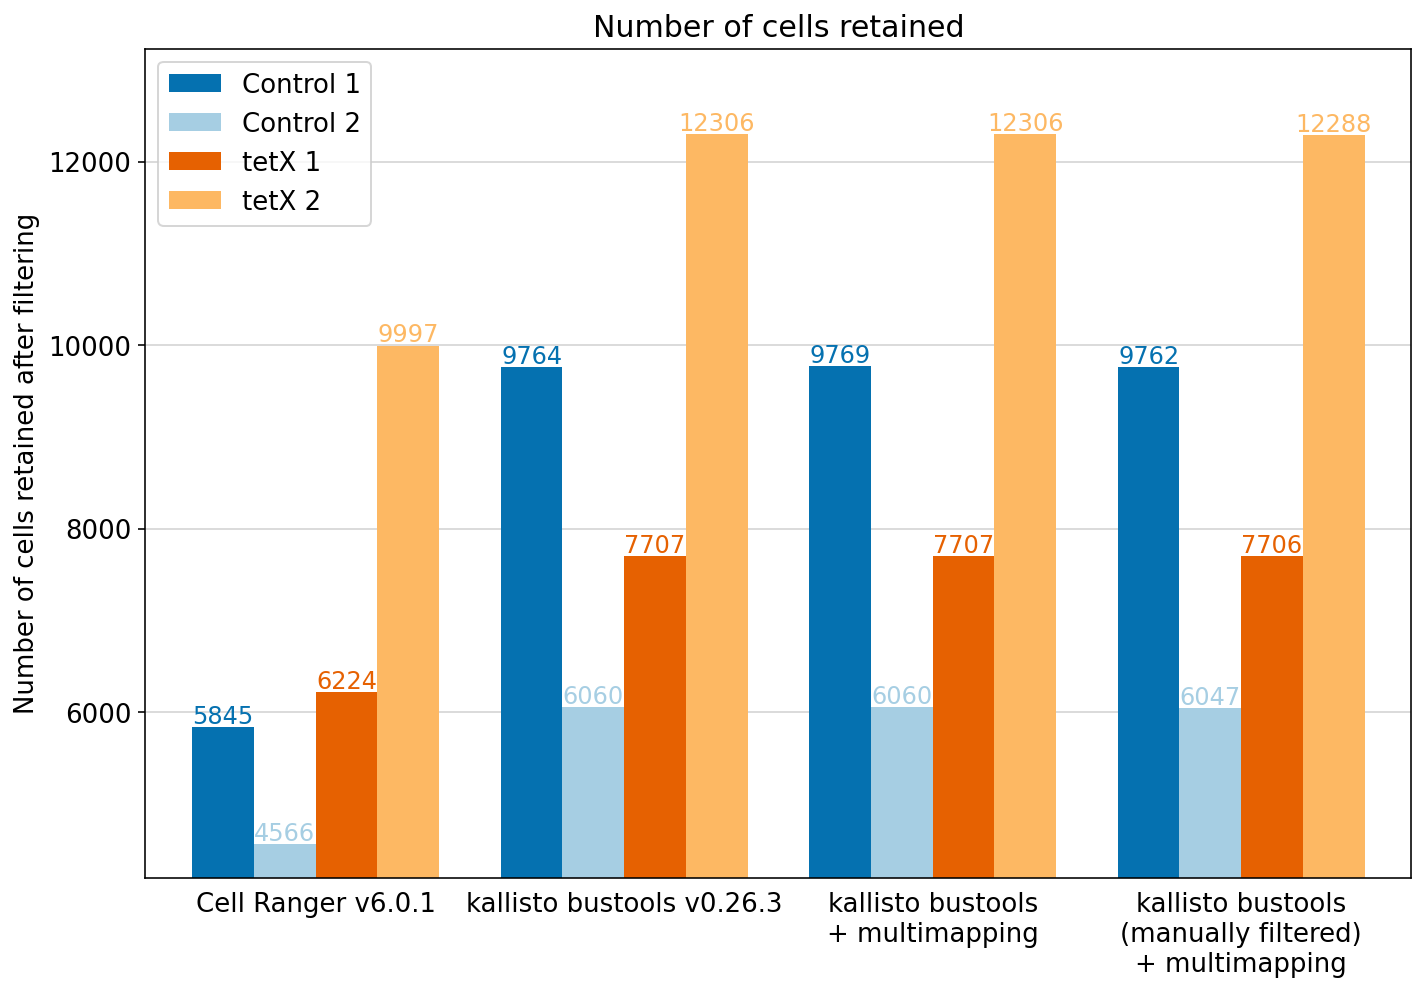

In [14]:
fig, ax = plt.subplots(figsize=figsize)

for i, tool in enumerate(cells_plot.index.values):
    ## Plot # of cells retained after basic filtering
    # Define positions of bars
    pos1 = i - width*1.5
    pos2 = i - width/2
    pos3 = i + width/2
    pos4 = i + width*1.5
    
    if i == 0:
        ax.bar(pos1, cells_plot.loc[tool].values[0], width=width, color=colors[0], label=stats_plot.loc[tool].index[0])
        ax.bar(pos2, cells_plot.loc[tool].values[1], width=width, color=colors[1], label=stats_plot.loc[tool].index[1])
        ax.bar(pos3, cells_plot.loc[tool].values[2], width=width, color=colors[2], label=stats_plot.loc[tool].index[2])
        ax.bar(pos4, cells_plot.loc[tool].values[3], width=width, color=colors[3], label=stats_plot.loc[tool].index[3]) 
    
    else:
        ax.bar(pos1, cells_plot.loc[tool].values[0], width=width, color=colors[0])
        ax.bar(pos2, cells_plot.loc[tool].values[1], width=width, color=colors[1])
        ax.bar(pos3, cells_plot.loc[tool].values[2], width=width, color=colors[2])
        ax.bar(pos4, cells_plot.loc[tool].values[3], width=width, color=colors[3]) 
    
    # Add # of cells number above each bar
    ax.text(pos1, cells_plot.loc[tool].values[0]+40, int(cells_plot.loc[tool].values[0]), color=colors[0], ha="center", fontsize=fontsize-1)
    ax.text(pos2, cells_plot.loc[tool].values[1]+40, int(cells_plot.loc[tool].values[1]), color=colors[1], ha="center", fontsize=fontsize-1)
    ax.text(pos3, cells_plot.loc[tool].values[2]+40, int(cells_plot.loc[tool].values[2]), color=colors[2], ha="center", fontsize=fontsize-1)
    ax.text(pos4, cells_plot.loc[tool].values[3]+40, int(cells_plot.loc[tool].values[3]), color=colors[3], ha="center", fontsize=fontsize-1)

# Set x-axis labels
labels = cells_plot.index.values
x = np.arange(len(labels))
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=fontsize)
ax.tick_params(bottom=False)

# Add labels
ax.set_title('Number of cells retained', fontsize=fontsize+2)
ax.set_ylabel('Number of cells retained after filtering', fontsize=fontsize)
# ax.set_xlabel('Tool', fontsize=fontsize)
ax.tick_params(axis='both', labelsize=fontsize)

ax.margins(x=0.04)

# Set y axis limits
ax.set_ylim(bottom=4200, top=13230)

# Add red line at 50% reads mapped / 10,000 cells retained
# ax.axhline(50, color="gray", ls="--", lw=1)

# Add grid
ax.yaxis.grid(color='lightgray')
ax.set_axisbelow(True)

# Add legend
ax.legend(fontsize=fontsize)  
# ax.legend(bbox_to_anchor=(1.001, 1.025), loc='upper left',fontsize=fontsize)

plt.tight_layout()
plt.savefig("figures/0_cells_retained.png", dpi=300, bbox_inches='tight')
plt.savefig("figures/0_cells_retained.svg", dpi=300, bbox_inches='tight')

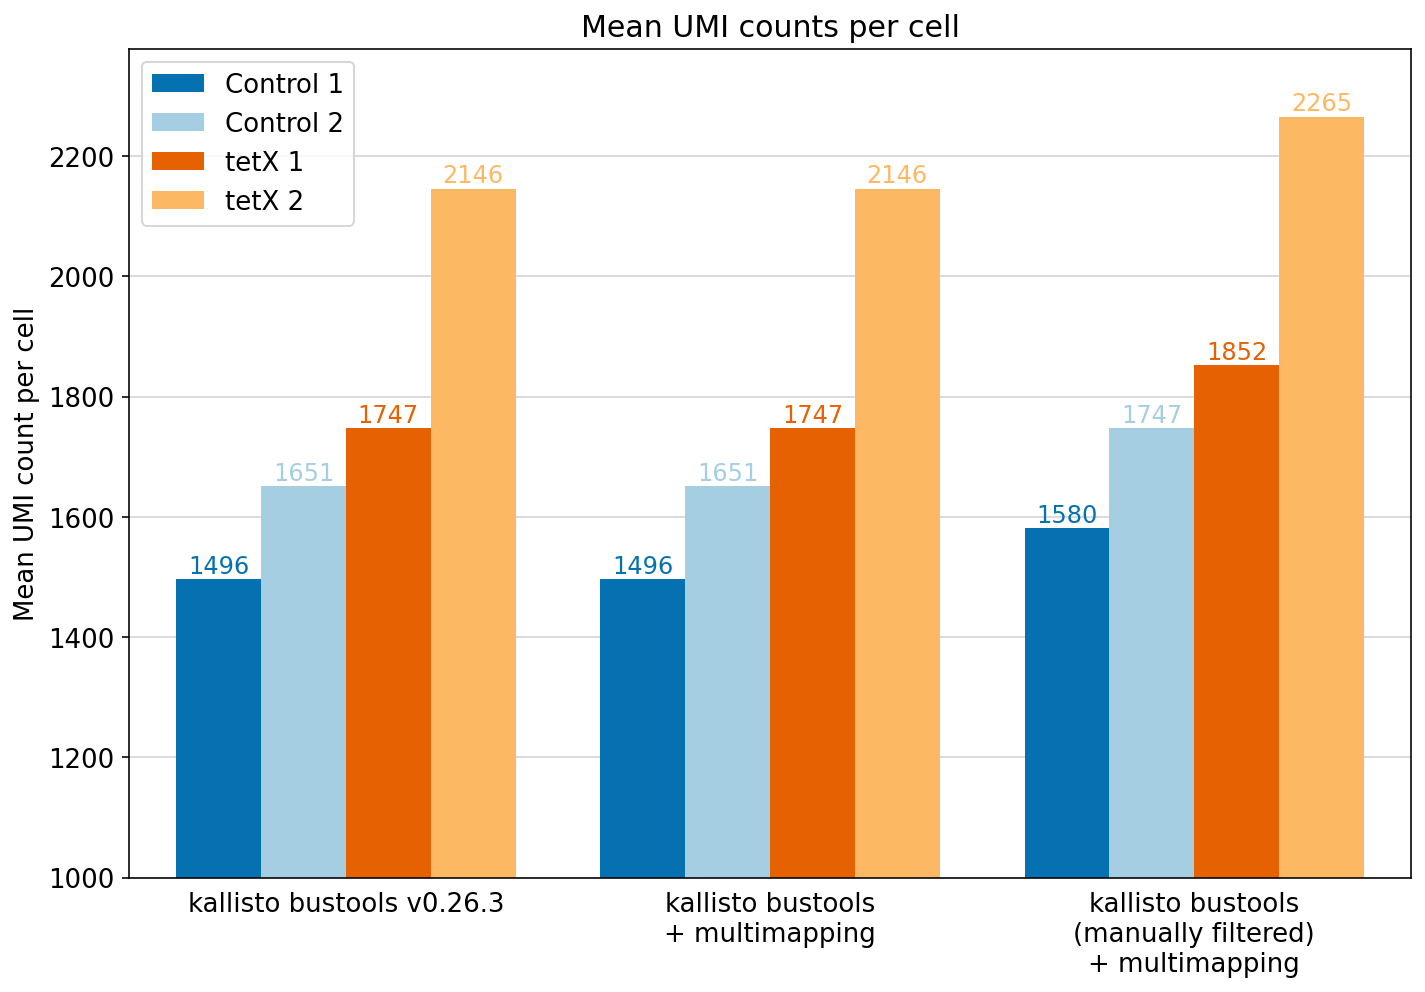

In [18]:
fig, ax = plt.subplots(figsize=figsize)

for i, tool in enumerate(umi_plot.index.values):
    ## Plot # of cells retained after basic filtering
    # Define positions of bars
    pos1 = i - width*1.5
    pos2 = i - width/2
    pos3 = i + width/2
    pos4 = i + width*1.5
    
    if i == 0:
        ax.bar(pos1, umi_plot.loc[tool].values[0], width=width, color=colors[0], label=umi_plot.loc[tool].index[0])
        ax.bar(pos2, umi_plot.loc[tool].values[1], width=width, color=colors[1], label=umi_plot.loc[tool].index[1])
        ax.bar(pos3, umi_plot.loc[tool].values[2], width=width, color=colors[2], label=umi_plot.loc[tool].index[2])
        ax.bar(pos4, umi_plot.loc[tool].values[3], width=width, color=colors[3], label=umi_plot.loc[tool].index[3]) 
    
    else:
        ax.bar(pos1, umi_plot.loc[tool].values[0], width=width, color=colors[0])
        ax.bar(pos2, umi_plot.loc[tool].values[1], width=width, color=colors[1])
        ax.bar(pos3, umi_plot.loc[tool].values[2], width=width, color=colors[2])
        ax.bar(pos4, umi_plot.loc[tool].values[3], width=width, color=colors[3]) 
    
    # Add # of cells number above each bar
    ax.text(pos1, umi_plot.loc[tool].values[0]+10, int(umi_plot.loc[tool].values[0]), color=colors[0], ha="center", fontsize=fontsize-1)
    ax.text(pos2, umi_plot.loc[tool].values[1]+10, int(umi_plot.loc[tool].values[1]), color=colors[1], ha="center", fontsize=fontsize-1)
    ax.text(pos3, umi_plot.loc[tool].values[2]+10, int(umi_plot.loc[tool].values[2]), color=colors[2], ha="center", fontsize=fontsize-1)
    ax.text(pos4, umi_plot.loc[tool].values[3]+10, int(umi_plot.loc[tool].values[3]), color=colors[3], ha="center", fontsize=fontsize-1)

# Set x-axis labels
labels = umi_plot.index.values
x = np.arange(len(labels))
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=fontsize)
ax.tick_params(bottom=False)

# Add labels
ax.set_title('Mean UMI counts per cell', fontsize=fontsize+2)
ax.set_ylabel('Mean UMI count per cell', fontsize=fontsize)
# ax.set_xlabel('Tool', fontsize=fontsize)
ax.tick_params(axis='both', labelsize=fontsize)

ax.margins(x=0.04)

# Set y axis limits
ax.set_ylim(bottom=1000)

# Add red line at 50% reads mapped / 10,000 cells retained
# ax.axhline(50, color="gray", ls="--", lw=1)

# Add grid
ax.yaxis.grid(color='lightgray')
ax.set_axisbelow(True)

# Add legend
ax.legend(fontsize=fontsize)    

plt.tight_layout()
plt.savefig("figures/0_mean_umi.png", dpi=300, bbox_inches='tight')
plt.savefig("figures/0_mean_umi.svg", dpi=300, bbox_inches='tight')

___

# Clean up dataframe for line plot

In [16]:
# # Rename columns for ease
# stats = stats.rename(
#     columns={
#         "Dataset (short name)": "dataset",
#         "Preprocessing tool": "tool",
#         "# of cells (after filtering)": "cells",
#         'Reads mapped confidently to transcriptome (%) (kb: "p_pseudoaligned"; cellranger: "Reads Mapped Confidently to Transcriptome")': "perc_aligned",
#     }
# )

# # Set tool columns as categorical
# stats["tool"] = stats["tool"].astype("category")

# # Rename 'tool' column
# stats["tool"] = stats["tool"].cat.rename_categories(
#     {
#         "cellranger": "Cell Ranger v6.0.1",
#         "kallisto bustools": "kallisto bustools v0.26.3",
#         "kallisto bustools --mm (GFP, tetx, and PEST added to ref)": "kallisto bustools\n+multimapping",
#         "kallisto bustools unfiltered --mm (GFP, tetx, and PEST added to ref)": "kallisto bustools\n(unfiltered)\n+multimapping",
#     }
# )

# # Set dataset columns as categorical
# stats["dataset"] = stats["dataset"].astype("category")

# # Rename 'dataset' column
# stats["dataset"] = stats["dataset"].cat.rename_categories(
#     {
#         "C1": "Control 1",
#         "C2": "Control 2",
#         "E1": "tetX 1",
#         "E2": "tetX 2",
#     }
# )

# stats = stats.sort_values("tool")

In [17]:
# fig, ax = plt.subplots(figsize=(15, 9))
# # Create another axes that shares the same x-axis as ax
# ax2 = ax.twinx()

# colors = ["blue", "lightblue", "darkorange", "moccasin"]
# fontsize = 13

# for i, dataset in enumerate(stats["dataset"].unique()):
#     x = stats[stats["dataset"]==dataset]["tool"].values
#     y = stats[stats["dataset"]==dataset]["perc_aligned"].values
#     y2 = stats[stats["dataset"]==dataset]["cells"].values
    
#     ax.plot(x, y, color=colors[i], label=dataset)
#     ax2.plot(x, y2, color=colors[i], ls="--")
    
# # Add labels
# ax.set_ylabel('Reads mapped confidently to transcriptome (%)', fontsize=fontsize)
# ax2.set_ylabel('Number of cells retained after filtering', fontsize=fontsize)
# # ax.set_xlabel('Tool', fontsize=fontsize)

# ax.tick_params(axis='both', labelsize=fontsize)
    
# # Add legend
# ax.legend(fontsize=fontsize)